In [1]:

from tensorflow import keras
from keras.datasets import mnist
import matplotlib.pyplot as plt
from codecarbon import track_emissions
from tensorflow.keras.callbacks import EarlyStopping

(X_train, y_train_label), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape((-1,28,28,1)) 
X_test = X_test.reshape((-1,28,28,1)) 
y_train = keras.utils.to_categorical(y_train_label)

2025-03-26 16:24:18.587543: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-26 16:24:18.623972: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
X_train.shape, y_train.shape

((60000, 28, 28, 1), (60000, 10))

In [3]:
def show_picture(image_value, label):
    plt.imshow(image_value, cmap='grey')
    plt.title(f'Picture label is {label}')
    plt.show()

In [4]:
X_test.shape

(10000, 28, 28, 1)

In [5]:
X_validation = X_test[:5000]
y_validation = keras.utils.to_categorical(y_test[:5000])
X_validation.shape, y_validation.shape
X_test = X_test[5000:]
y_test = keras.utils.to_categorical(y_test[5000:])
X_validation.shape, y_validation.shape, X_test.shape, y_test.shape

((5000, 28, 28, 1), (5000, 10), (5000, 28, 28, 1), (5000, 10))

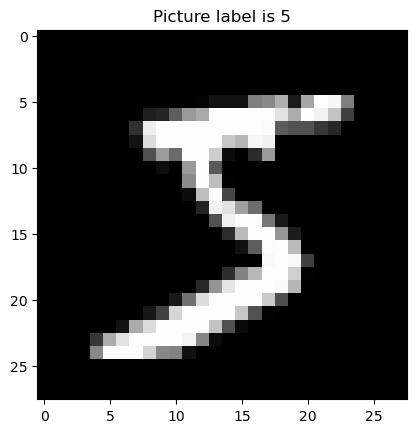

In [6]:
show_picture(X_train[0],y_train_label[0])

In [7]:
from keras import layers
from keras import regularizers
simple = keras.models.Sequential(name='cnn')
simple.add(keras.layers.InputLayer(shape=(28,28,1), name='input'))
simple.add(keras.layers.Rescaling(scale=2/255, offset=1.0, name='rescale') )

simple.add(keras.layers.Conv2D(filters=32, kernel_size=3, strides=1, activation='relu', name='conv1'))
simple.add(keras.layers.MaxPooling2D(name='pool1'))
simple.add(keras.layers.Conv2D(filters=64, kernel_size=4, activation='relu', strides=1, name='conv2'))
simple.add(keras.layers.MaxPooling2D(name='pool2'))
simple.add(keras.layers.Conv2D(filters=128, kernel_size=3,activation='relu',  strides=1, name='conv3'))
simple.add(keras.layers.Flatten(name='flatten'))
simple.add(keras.layers.Dense(units=10, kernel_regularizer= regularizers.L1L2(l1=1e-5, l2=1e-4), activation='softmax', name='output'))

simple.summary()

Model: "cnn"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescale (Rescaling)             │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool1 (MaxPooling2D)            │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2 (Conv2D)                  │ (None, 10, 10, 64)     │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool2 (MaxPooling2D)            │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3 (Conv2D)                  │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │        11,530 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,538 (463.04 KB)

 Trainable params: 118,538 (463.04 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
mid = keras.models.Sequential(name='cnn')
mid.add(keras.layers.InputLayer(shape=(28,28,1), name='input'))
mid.add(keras.layers.Rescaling(scale=2/255, offset=1.0, name='rescale') )

mid.add(keras.layers.Conv2D(filters=32, kernel_size=3, strides=1, activation='relu', name='conv1'))
mid.add(keras.layers.MaxPooling2D(name='pool1'))
mid.add(keras.layers.Conv2D(filters=64, kernel_size=4, activation='relu', strides=1, name='conv2'))
mid.add(keras.layers.MaxPooling2D(name='pool2'))
mid.add(keras.layers.Conv2D(filters=128, kernel_size=3,activation='relu',  strides=1, name='conv3'))
mid.add(keras.layers.Flatten(name='flatten'))
mid.add(keras.layers.Dense(units=512, activation='relu', name='dense1'))
mid.add(keras.layers.Dense(units=256, activation='relu', name='dense2'))
mid.add(keras.layers.Dense(units=10, activation='softmax', kernel_regularizer= regularizers.L1L2(l1=1e-5, l2=1e-4), name='output'))

mid.summary()

Model: "cnn"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescale (Rescaling)             │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool1 (MaxPooling2D)            │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2 (Conv2D)                  │ (None, 10, 10, 64)     │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool2 (MaxPooling2D)            │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3 (Conv2D)                  │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense1 (Dense)                  │ (None, 512)            │       590,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense2 (Dense)                  │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 831,242 (3.17 MB)

 Trainable params: 831,242 (3.17 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
large = keras.models.Sequential(name='cnn')
large.add(keras.layers.InputLayer(shape=(28,28,1), name='input'))
large.add(keras.layers.Rescaling(scale=2/255, offset=1.0, name='rescale') )

large.add(keras.layers.Conv2D(filters=32, kernel_size=3, strides=1, activation='relu', name='conv1'))
large.add(keras.layers.MaxPooling2D(name='pool1'))
large.add(keras.layers.Conv2D(filters=64, kernel_size=4, activation='relu', strides=1, name='conv2'))
large.add(keras.layers.MaxPooling2D(name='pool2'))
large.add(keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu',  strides=1, name='conv3'))
large.add(keras.layers.Flatten(name='flatten'))
large.add(keras.layers.Dense(units=1024, activation='relu', name='dense0'))
large.add(keras.layers.Dense(units=512, activation='relu', name='dense1'))
large.add(keras.layers.Dense(units=256, activation='relu', name='dense2'))
large.add(keras.layers.Dense(units=128, activation='relu', name='dense3'))
large.add(keras.layers.Dense(units=64, activation='relu', name='dense4'))
large.add(keras.layers.Dense(units=10, activation='softmax',kernel_regularizer= regularizers.L1L2(l1=1e-5, l2=1e-4), name='output'))

large.summary()

Model: "cnn"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescale (Rescaling)             │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool1 (MaxPooling2D)            │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2 (Conv2D)                  │ (None, 10, 10, 64)     │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool2 (MaxPooling2D)            │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3 (Conv2D)                  │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense0 (Dense)                  │ (None, 1024)           │     1,180,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense1 (Dense)                  │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense2 (Dense)                  │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense3 (Dense)                  │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense4 (Dense)                  │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,985,610 (7.57 MB)

 Trainable params: 1,985,610 (7.57 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
call_back_simple=keras.callbacks.ModelCheckpoint(
    filepath='/homes/rmeshita/Documents/Programming_6/Green_ML/model_save.keras',
    monitor='val_loss',
    save_best_only=True
)
call_back_mid=keras.callbacks.ModelCheckpoint(
    filepath='/homes/rmeshita/Documents/Programming_6/Green_ML/mid_model_save.keras',
    monitor='val_loss',
    save_best_only=True
)
call_back_large=keras.callbacks.ModelCheckpoint(
    filepath='/homes/rmeshita/Documents/Programming_6/Green_ML/large_model_save.keras',
    monitor='val_loss',
    save_best_only=True
)
early_stopping = EarlyStopping(
    monitor = 'val_loss',
    patience = 2,
    verbose = 1,
    restore_best_weights = True,
    mode = 'auto'
)

# Experiment 1: Carbon emission on Different model sizes


[codecarbon INFO @ 16:24:25] [setup] RAM Tracking...
[codecarbon INFO @ 16:24:25] [setup] GPU Tracking...
[codecarbon INFO @ 16:24:25] No GPU found.
[codecarbon INFO @ 16:24:25] [setup] CPU Tracking...
[codecarbon WARNING @ 16:24:25] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 16:24:26] We saw that you have a Intel(R) Xeon(R) Gold 6248 CPU @ 2.50GHz but we don't know it. Please contact us.
[codecarbon INFO @ 16:24:26] CPU Model on constant consumption mode: Intel(R) Xeon(R) Gold 6248 CPU @ 2.50GHz
[codecarbon INFO @ 16:24:26] >>> Tracker's metadata:
[codecarbon INFO @ 16:24:26]   Platform system: Linux-6.1.0-32-amd64-x86_64-with-glibc2.36
[codecarbon INFO @ 16:24:26]   Python version: 3.12.3
[codecarbon INFO @ 16:24:26]   CodeCarbon version: 2.2.2
[codecarbon INFO @ 16:24:26]   Available RAM : 880.353 GB
[codecarbon INFO @ 16:24:26]   CPU count: 80
[codecarbon INFO @ 16:24:26]   CPU model: Intel(R) Xeon(R) Gold 6248 CPU @ 2.50GHz
[codecarbon INF

Epoch 1/5
2566/3000 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - categorical_accuracy: 0.7629 - loss: 0.7551

[codecarbon INFO @ 16:24:44] Energy consumed for RAM : 0.001376 kWh. RAM Power : 330.1325168609619 W
[codecarbon INFO @ 16:24:44] Energy consumed for all CPUs : 0.000177 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:24:44] 0.001553 kWh of electricity used since the beginning.


3000/3000 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - categorical_accuracy: 0.7827 - loss: 0.6939 - val_categorical_accuracy: 0.9648 - val_loss: 0.1190
Epoch 2/5
2115/3000 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - categorical_accuracy: 0.9731 - loss: 0.0962

[codecarbon INFO @ 16:24:59] Energy consumed for RAM : 0.002751 kWh. RAM Power : 330.1325168609619 W
[codecarbon INFO @ 16:24:59] Energy consumed for all CPUs : 0.000354 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:24:59] 0.003105 kWh of electricity used since the beginning.


3000/3000 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - categorical_accuracy: 0.9736 - loss: 0.0947 - val_categorical_accuracy: 0.9726 - val_loss: 0.0884
Epoch 3/5
1427/3000 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - categorical_accuracy: 0.9804 - loss: 0.0702

[codecarbon INFO @ 16:25:14] Energy consumed for RAM : 0.004126 kWh. RAM Power : 330.1325168609619 W
[codecarbon INFO @ 16:25:14] Energy consumed for all CPUs : 0.000531 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:25:14] 0.004658 kWh of electricity used since the beginning.


3000/3000 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - categorical_accuracy: 0.9805 - loss: 0.0696 - val_categorical_accuracy: 0.9760 - val_loss: 0.0810
Epoch 4/5
 851/3000 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - categorical_accuracy: 0.9856 - loss: 0.0575

[codecarbon INFO @ 16:25:29] Energy consumed for RAM : 0.005502 kWh. RAM Power : 330.1325168609619 W
[codecarbon INFO @ 16:25:29] Energy consumed for all CPUs : 0.000708 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:25:29] 0.006210 kWh of electricity used since the beginning.


3000/3000 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - categorical_accuracy: 0.9851 - loss: 0.0574 - val_categorical_accuracy: 0.9756 - val_loss: 0.0757
Epoch 5/5
 275/3000 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - categorical_accuracy: 0.9878 - loss: 0.0454

[codecarbon INFO @ 16:25:44] Energy consumed for RAM : 0.006877 kWh. RAM Power : 330.1325168609619 W
[codecarbon INFO @ 16:25:44] Energy consumed for all CPUs : 0.000885 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:25:44] 0.007762 kWh of electricity used since the beginning.


2808/3000 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - categorical_accuracy: 0.9867 - loss: 0.0493

[codecarbon INFO @ 16:25:59] Energy consumed for RAM : 0.008252 kWh. RAM Power : 330.1325168609619 W
[codecarbon INFO @ 16:25:59] Energy consumed for all CPUs : 0.001062 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:25:59] 0.009315 kWh of electricity used since the beginning.


3000/3000 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - categorical_accuracy: 0.9867 - loss: 0.0493 - val_categorical_accuracy: 0.9818 - val_loss: 0.0632


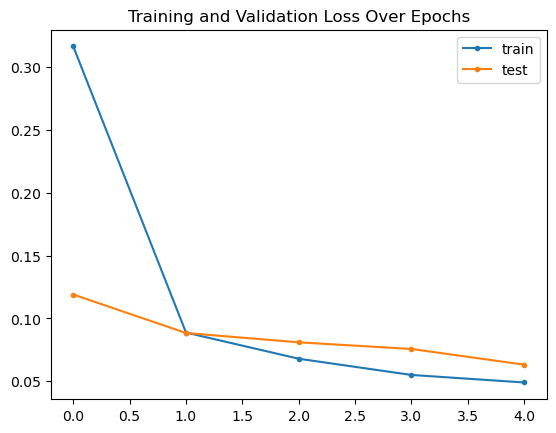

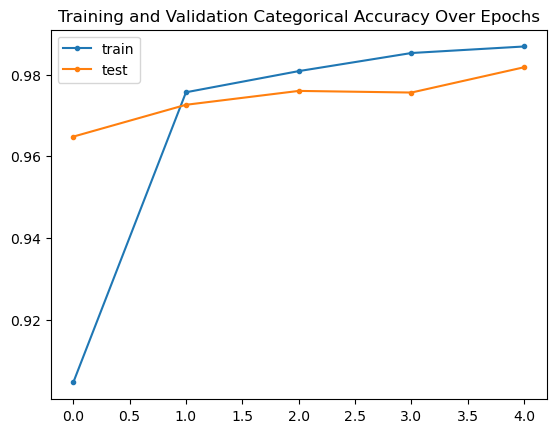

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - categorical_accuracy: 0.9919 - loss: 0.0312


[codecarbon INFO @ 16:26:02] 
Graceful stopping: collecting and writing information.
Please wait a few seconds...
[codecarbon INFO @ 16:26:02] Energy consumed for RAM : 0.008497 kWh. RAM Power : 330.1325168609619 W
[codecarbon INFO @ 16:26:02] Energy consumed for all CPUs : 0.001094 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:26:02] 0.009591 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:26:02] Done!



0.032507870346307755 0.9918000102043152


In [11]:
@track_emissions
def simple_model_run(X_train, y_train, call_back_simple, X_validation, y_validation, X_test, y_test):
    # Mid Model
    simple.compile(
        loss= keras.losses.CategoricalCrossentropy(),
        optimizer=keras.optimizers.SGD(),
        metrics=[keras.metrics.CategoricalAccuracy()]
    )
    history = simple.fit(X_train,y_train,
                        epochs=5, batch_size=20,
                        callbacks=[call_back_simple],
                        validation_data=(X_validation,y_validation) )
    #plotting loss 
    plt.plot(history.history['loss'],'.-', label = 'train')
    plt.plot(history.history['val_loss'],'.-', label = 'test')
    plt.title('Training and Validation Loss Over Epochs')
    plt.legend()
    plt.show()

    # plotting categorical accuracy
    plt.plot(history.history['categorical_accuracy'],'.-', label = 'train')
    plt.plot(history.history['val_categorical_accuracy'],'.-', label = 'test')
    plt.legend()
    plt.title('Training and Validation Categorical Accuracy Over Epochs')
    plt.show()
    
    loss_simple,acc_simple = simple.evaluate(X_test,y_test)
    print(loss_simple,acc_simple)

simple_model_run(X_train, y_train, call_back_simple, X_validation, y_validation, X_test, y_test)

[codecarbon INFO @ 16:26:02] [setup] RAM Tracking...
[codecarbon INFO @ 16:26:02] [setup] GPU Tracking...
[codecarbon INFO @ 16:26:02] No GPU found.
[codecarbon INFO @ 16:26:02] [setup] CPU Tracking...
[codecarbon WARNING @ 16:26:02] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 16:26:03] We saw that you have a Intel(R) Xeon(R) Gold 6248 CPU @ 2.50GHz but we don't know it. Please contact us.
[codecarbon INFO @ 16:26:03] CPU Model on constant consumption mode: Intel(R) Xeon(R) Gold 6248 CPU @ 2.50GHz
[codecarbon INFO @ 16:26:03] >>> Tracker's metadata:
[codecarbon INFO @ 16:26:03]   Platform system: Linux-6.1.0-32-amd64-x86_64-with-glibc2.36
[codecarbon INFO @ 16:26:03]   Python version: 3.12.3
[codecarbon INFO @ 16:26:03]   CodeCarbon version: 2.2.2
[codecarbon INFO @ 16:26:03]   Available RAM : 880.353 GB
[codecarbon INFO @ 16:26:03]   CPU count: 80
[codecarbon INFO @ 16:26:03]   CPU model: Intel(R) Xeon(R) Gold 6248 CPU @ 2.50GHz
[codecarbon INF

Epoch 1/5
2182/3000 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - categorical_accuracy: 0.7621 - loss: 0.7549

[codecarbon INFO @ 16:26:22] Energy consumed for RAM : 0.001376 kWh. RAM Power : 330.1325168609619 W
[codecarbon INFO @ 16:26:22] Energy consumed for all CPUs : 0.000177 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:26:22] 0.001553 kWh of electricity used since the beginning.


3000/3000 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - categorical_accuracy: 0.7997 - loss: 0.6373 - val_categorical_accuracy: 0.9482 - val_loss: 0.1661
Epoch 2/5


[codecarbon INFO @ 16:26:37] Energy consumed for RAM : 0.002751 kWh. RAM Power : 330.1325168609619 W
[codecarbon INFO @ 16:26:37] Energy consumed for all CPUs : 0.000354 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:26:37] 0.003105 kWh of electricity used since the beginning.


 547/3000 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - categorical_accuracy: 0.9729 - loss: 0.0946

[codecarbon INFO @ 16:26:52] Energy consumed for RAM : 0.004126 kWh. RAM Power : 330.1325168609619 W
[codecarbon INFO @ 16:26:52] Energy consumed for all CPUs : 0.000531 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:26:52] 0.004657 kWh of electricity used since the beginning.


2849/3000 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - categorical_accuracy: 0.9731 - loss: 0.0909

[codecarbon INFO @ 16:27:07] Energy consumed for RAM : 0.005501 kWh. RAM Power : 330.1325168609619 W
[codecarbon INFO @ 16:27:07] Energy consumed for all CPUs : 0.000708 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:27:07] 0.006210 kWh of electricity used since the beginning.


3000/3000 ━━━━━━━━━━━━━━━━━━━━ 41s 7ms/step - categorical_accuracy: 0.9732 - loss: 0.0906 - val_categorical_accuracy: 0.9730 - val_loss: 0.0866
Epoch 3/5
1782/3000 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - categorical_accuracy: 0.9833 - loss: 0.0620

[codecarbon INFO @ 16:27:22] Energy consumed for RAM : 0.006877 kWh. RAM Power : 330.1325168609619 W
[codecarbon INFO @ 16:27:22] Energy consumed for all CPUs : 0.000885 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:27:22] 0.007762 kWh of electricity used since the beginning.


3000/3000 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - categorical_accuracy: 0.9834 - loss: 0.0606 - val_categorical_accuracy: 0.9720 - val_loss: 0.0869
Epoch 4/5


[codecarbon INFO @ 16:27:37] Energy consumed for RAM : 0.008252 kWh. RAM Power : 330.1325168609619 W
[codecarbon INFO @ 16:27:37] Energy consumed for all CPUs : 0.001062 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:27:37] 0.009314 kWh of electricity used since the beginning.


 263/3000 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - categorical_accuracy: 0.9878 - loss: 0.0467

[codecarbon INFO @ 16:27:52] Energy consumed for RAM : 0.009627 kWh. RAM Power : 330.1325168609619 W
[codecarbon INFO @ 16:27:52] Energy consumed for all CPUs : 0.001240 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:27:52] 0.010867 kWh of electricity used since the beginning.


2441/3000 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - categorical_accuracy: 0.9867 - loss: 0.0473

[codecarbon INFO @ 16:28:07] Energy consumed for RAM : 0.011003 kWh. RAM Power : 330.1325168609619 W
[codecarbon INFO @ 16:28:07] Energy consumed for all CPUs : 0.001417 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:28:07] 0.012419 kWh of electricity used since the beginning.


3000/3000 ━━━━━━━━━━━━━━━━━━━━ 42s 7ms/step - categorical_accuracy: 0.9866 - loss: 0.0473 - val_categorical_accuracy: 0.9724 - val_loss: 0.0817
Epoch 5/5
1479/3000 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - categorical_accuracy: 0.9880 - loss: 0.0411

[codecarbon INFO @ 16:28:22] Energy consumed for RAM : 0.012378 kWh. RAM Power : 330.1325168609619 W
[codecarbon INFO @ 16:28:22] Energy consumed for all CPUs : 0.001594 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:28:22] 0.013972 kWh of electricity used since the beginning.


3000/3000 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - categorical_accuracy: 0.9883 - loss: 0.0399 - val_categorical_accuracy: 0.9774 - val_loss: 0.0655


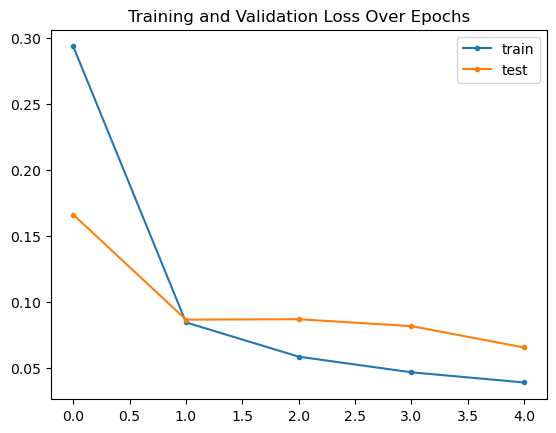

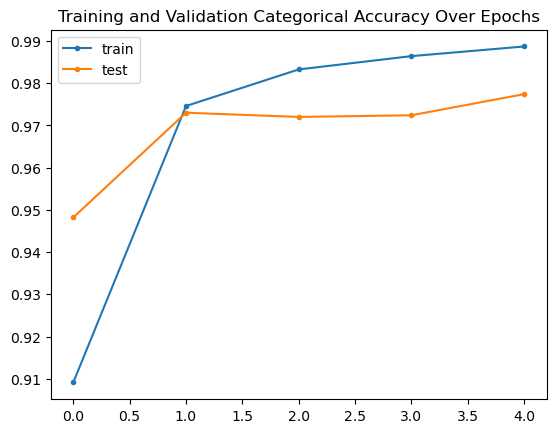

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - categorical_accuracy: 0.9927 - loss: 0.0259


[codecarbon INFO @ 16:28:34] 
Graceful stopping: collecting and writing information.
Please wait a few seconds...


0.025647783651947975 0.9923999905586243


[codecarbon INFO @ 16:28:34] Energy consumed for RAM : 0.013508 kWh. RAM Power : 330.1325168609619 W
[codecarbon INFO @ 16:28:34] Energy consumed for all CPUs : 0.001739 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:28:34] 0.015247 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:28:34] Done!



In [12]:
@track_emissions
def mid_model_run(X_train, y_train, call_back_mid, X_validation, y_validation, X_test, y_test):
# Mid Model
    mid.compile(
        loss= keras.losses.CategoricalCrossentropy(),
        optimizer=keras.optimizers.SGD(),
        metrics=[keras.metrics.CategoricalAccuracy()]
    )
    mid_history = mid.fit(X_train,y_train,
                        epochs=5, batch_size=20,
                        callbacks=[call_back_mid],
                        validation_data=(X_validation,y_validation))
    #plotting loss 
    plt.plot(mid_history.history['loss'],'.-', label = 'train')
    plt.plot(mid_history.history['val_loss'],'.-', label = 'test')
    plt.title('Training and Validation Loss Over Epochs')
    plt.legend()
    plt.show()

    # plotting categorical accuracy
    plt.plot(mid_history.history['categorical_accuracy'],'.-', label = 'train')
    plt.plot(mid_history.history['val_categorical_accuracy'],'.-', label = 'test')
    plt.legend()
    plt.title('Training and Validation Categorical Accuracy Over Epochs')
    plt.show()
    
    loss_mid,acc_mid = mid.evaluate(X_test,y_test)
    print(loss_mid,acc_mid)

mid_model_run(X_train, y_train, call_back_mid, X_validation, y_validation, X_test, y_test)

[codecarbon INFO @ 16:28:34] [setup] RAM Tracking...
[codecarbon INFO @ 16:28:34] [setup] GPU Tracking...
[codecarbon INFO @ 16:28:34] No GPU found.
[codecarbon INFO @ 16:28:34] [setup] CPU Tracking...
[codecarbon WARNING @ 16:28:34] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 16:28:35] We saw that you have a Intel(R) Xeon(R) Gold 6248 CPU @ 2.50GHz but we don't know it. Please contact us.
[codecarbon INFO @ 16:28:35] CPU Model on constant consumption mode: Intel(R) Xeon(R) Gold 6248 CPU @ 2.50GHz
[codecarbon INFO @ 16:28:35] >>> Tracker's metadata:
[codecarbon INFO @ 16:28:35]   Platform system: Linux-6.1.0-32-amd64-x86_64-with-glibc2.36
[codecarbon INFO @ 16:28:35]   Python version: 3.12.3
[codecarbon INFO @ 16:28:35]   CodeCarbon version: 2.2.2
[codecarbon INFO @ 16:28:35]   Available RAM : 880.353 GB
[codecarbon INFO @ 16:28:35]   CPU count: 80
[codecarbon INFO @ 16:28:35]   CPU model: Intel(R) Xeon(R) Gold 6248 CPU @ 2.50GHz
[codecarbon INF

Epoch 1/5
1790/3000 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - categorical_accuracy: 0.6519 - loss: 1.0855

[codecarbon INFO @ 16:28:54] Energy consumed for RAM : 0.001376 kWh. RAM Power : 330.1325168609619 W
[codecarbon INFO @ 16:28:54] Energy consumed for all CPUs : 0.000177 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:28:54] 0.001553 kWh of electricity used since the beginning.


3000/3000 ━━━━━━━━━━━━━━━━━━━━ 24s 8ms/step - categorical_accuracy: 0.7364 - loss: 0.8249 - val_categorical_accuracy: 0.9566 - val_loss: 0.1279
Epoch 2/5
 848/3000 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - categorical_accuracy: 0.9696 - loss: 0.0967

[codecarbon INFO @ 16:29:09] Energy consumed for RAM : 0.002751 kWh. RAM Power : 330.1325168609619 W
[codecarbon INFO @ 16:29:09] Energy consumed for all CPUs : 0.000354 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:29:09] 0.003105 kWh of electricity used since the beginning.


2995/3000 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - categorical_accuracy: 0.9710 - loss: 0.0916

[codecarbon INFO @ 16:29:24] Energy consumed for RAM : 0.004126 kWh. RAM Power : 330.1325168609619 W
[codecarbon INFO @ 16:29:24] Energy consumed for all CPUs : 0.000531 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:29:24] 0.004658 kWh of electricity used since the beginning.


3000/3000 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - categorical_accuracy: 0.9711 - loss: 0.0916 - val_categorical_accuracy: 0.9732 - val_loss: 0.0833
Epoch 3/5
2148/3000 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - categorical_accuracy: 0.9804 - loss: 0.0631

[codecarbon INFO @ 16:29:39] Energy consumed for RAM : 0.005502 kWh. RAM Power : 330.1325168609619 W
[codecarbon INFO @ 16:29:39] Energy consumed for all CPUs : 0.000708 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:29:39] 0.006210 kWh of electricity used since the beginning.


3000/3000 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - categorical_accuracy: 0.9808 - loss: 0.0619 - val_categorical_accuracy: 0.9788 - val_loss: 0.0655
Epoch 4/5
1277/3000 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - categorical_accuracy: 0.9869 - loss: 0.0425

[codecarbon INFO @ 16:29:54] Energy consumed for RAM : 0.006877 kWh. RAM Power : 330.1325168609619 W
[codecarbon INFO @ 16:29:54] Energy consumed for all CPUs : 0.000885 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:29:54] 0.007762 kWh of electricity used since the beginning.


3000/3000 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - categorical_accuracy: 0.9866 - loss: 0.0442 - val_categorical_accuracy: 0.9820 - val_loss: 0.0571
Epoch 5/5
 474/3000 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - categorical_accuracy: 0.9887 - loss: 0.0336

[codecarbon INFO @ 16:30:09] Energy consumed for RAM : 0.008252 kWh. RAM Power : 330.1325168609619 W
[codecarbon INFO @ 16:30:09] Energy consumed for all CPUs : 0.001062 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:30:09] 0.009315 kWh of electricity used since the beginning.


2812/3000 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - categorical_accuracy: 0.9892 - loss: 0.0346

[codecarbon INFO @ 16:30:24] Energy consumed for RAM : 0.009627 kWh. RAM Power : 330.1325168609619 W
[codecarbon INFO @ 16:30:24] Energy consumed for all CPUs : 0.001240 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:30:24] 0.010867 kWh of electricity used since the beginning.


3000/3000 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - categorical_accuracy: 0.9892 - loss: 0.0347 - val_categorical_accuracy: 0.9838 - val_loss: 0.0560


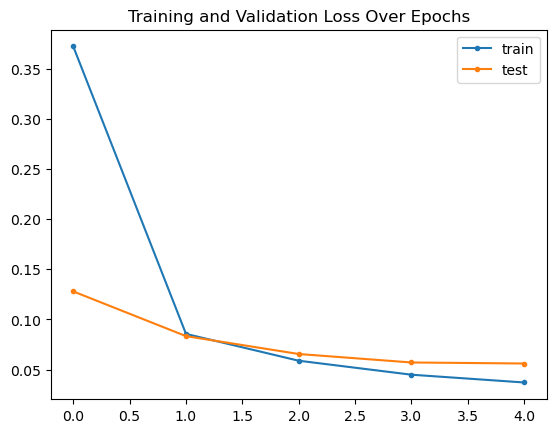

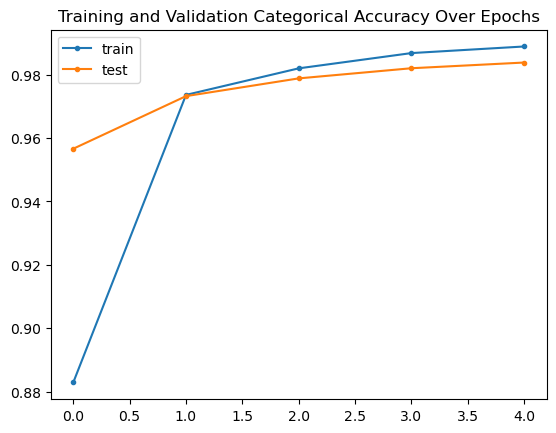

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - categorical_accuracy: 0.9934 - loss: 0.0239


[codecarbon INFO @ 16:30:27] 
Graceful stopping: collecting and writing information.
Please wait a few seconds...
[codecarbon INFO @ 16:30:27] Energy consumed for RAM : 0.009917 kWh. RAM Power : 330.1325168609619 W
[codecarbon INFO @ 16:30:27] Energy consumed for all CPUs : 0.001277 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:30:27] 0.011194 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:30:27] Done!



0.02609753981232643 0.9929999709129333


In [13]:

@track_emissions
def large_model_run(X_train, y_train, call_back_large, X_validation, y_validation, X_test, y_test):
    # Large Model
    large.compile(
        loss= keras.losses.CategoricalCrossentropy(),
        optimizer=keras.optimizers.SGD(),
        metrics=[keras.metrics.CategoricalAccuracy()]
    )
    large_history = large.fit(X_train,y_train,
                    epochs=5, batch_size=20,
                    callbacks=[call_back_large],
                    validation_data=(X_validation,y_validation))
    
    #plotting loss 
    plt.plot(large_history.history['loss'],'.-', label = 'train')
    plt.plot(large_history.history['val_loss'],'.-', label = 'test')
    plt.title('Training and Validation Loss Over Epochs')
    plt.legend()
    plt.show()

    # plotting categorical accuracy
    plt.plot(large_history.history['categorical_accuracy'],'.-', label = 'train')
    plt.plot(large_history.history['val_categorical_accuracy'],'.-', label = 'test')
    plt.title('Training and Validation Categorical Accuracy Over Epochs')
    plt.legend()
    plt.show()

    loss_large,acc_large = large.evaluate(X_test,y_test)
    print(loss_large,acc_large)
large_model_run(X_train, y_train, call_back_large, X_validation, y_validation, X_test, y_test)

# Experiment 2:  Effect of learning rate hyperparameter on carbon emission

Learning rate: 1e-10


[codecarbon INFO @ 16:30:27] [setup] RAM Tracking...
[codecarbon INFO @ 16:30:27] [setup] GPU Tracking...
[codecarbon INFO @ 16:30:27] No GPU found.
[codecarbon INFO @ 16:30:27] [setup] CPU Tracking...
[codecarbon WARNING @ 16:30:27] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 16:30:28] We saw that you have a Intel(R) Xeon(R) Gold 6248 CPU @ 2.50GHz but we don't know it. Please contact us.
[codecarbon INFO @ 16:30:28] CPU Model on constant consumption mode: Intel(R) Xeon(R) Gold 6248 CPU @ 2.50GHz
[codecarbon INFO @ 16:30:28] >>> Tracker's metadata:
[codecarbon INFO @ 16:30:28]   Platform system: Linux-6.1.0-32-amd64-x86_64-with-glibc2.36
[codecarbon INFO @ 16:30:28]   Python version: 3.12.3
[codecarbon INFO @ 16:30:28]   CodeCarbon version: 2.2.2
[codecarbon INFO @ 16:30:28]   Available RAM : 880.353 GB
[codecarbon INFO @ 16:30:28]   CPU count: 80
[codecarbon INFO @ 16:30:28]   CPU model: Intel(R) Xeon(R) Gold 6248 CPU @ 2.50GHz
[codecarbon INF

Epoch 1/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - categorical_accuracy: 0.9905 - loss: 0.0411 - val_categorical_accuracy: 0.9818 - val_loss: 0.0632
Epoch 2/10
 179/3000 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - categorical_accuracy: 0.9924 - loss: 0.0380

[codecarbon INFO @ 16:30:46] Energy consumed for RAM : 0.001376 kWh. RAM Power : 330.1325168609619 W
[codecarbon INFO @ 16:30:46] Energy consumed for all CPUs : 0.000177 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:30:46] 0.001553 kWh of electricity used since the beginning.


3000/3000 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - categorical_accuracy: 0.9908 - loss: 0.0406 - val_categorical_accuracy: 0.9818 - val_loss: 0.0632
Epoch 3/10
 521/3000 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - categorical_accuracy: 0.9886 - loss: 0.0505

[codecarbon INFO @ 16:31:01] Energy consumed for RAM : 0.002751 kWh. RAM Power : 330.1325168609619 W
[codecarbon INFO @ 16:31:01] Energy consumed for all CPUs : 0.000354 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:31:01] 0.003105 kWh of electricity used since the beginning.


3000/3000 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - categorical_accuracy: 0.9897 - loss: 0.0441 - val_categorical_accuracy: 0.9818 - val_loss: 0.0632
Epoch 3: early stopping
Restoring model weights from the end of the best epoch: 1.


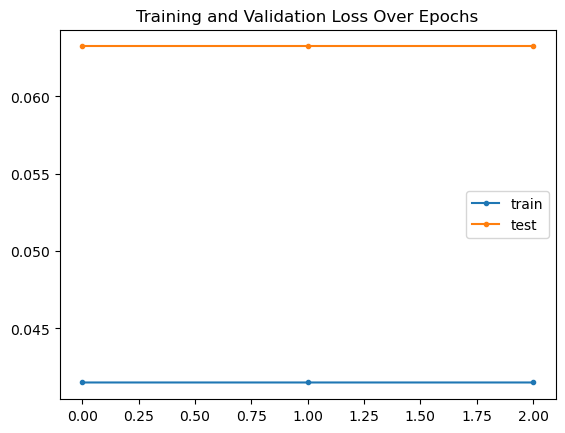

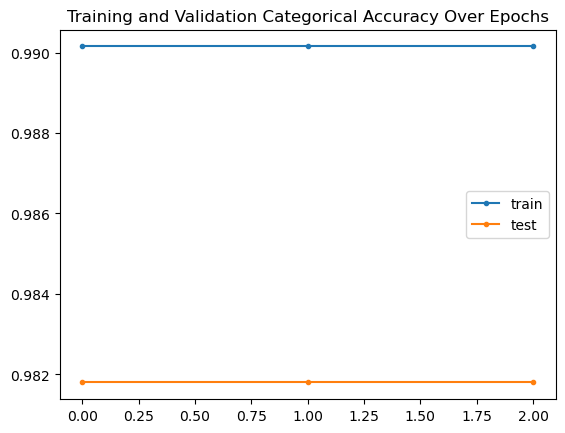

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - categorical_accuracy: 0.9919 - loss: 0.0312


[codecarbon INFO @ 16:31:14] 
Graceful stopping: collecting and writing information.
Please wait a few seconds...
[codecarbon INFO @ 16:31:14] Energy consumed for RAM : 0.003904 kWh. RAM Power : 330.1325168609619 W
[codecarbon INFO @ 16:31:14] Energy consumed for all CPUs : 0.000503 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:31:14] 0.004406 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:31:14] Done!

[codecarbon INFO @ 16:31:14] [setup] RAM Tracking...
[codecarbon INFO @ 16:31:14] [setup] GPU Tracking...
[codecarbon INFO @ 16:31:14] No GPU found.
[codecarbon INFO @ 16:31:14] [setup] CPU Tracking...
[codecarbon WARNING @ 16:31:14] No CPU tracking mode found. Falling back on CPU constant mode.


Loss: 0.032507870346307755, Accuracy: 0.9918000102043152
Learning rate: 1e-05


[codecarbon WARNING @ 16:31:15] We saw that you have a Intel(R) Xeon(R) Gold 6248 CPU @ 2.50GHz but we don't know it. Please contact us.
[codecarbon INFO @ 16:31:15] CPU Model on constant consumption mode: Intel(R) Xeon(R) Gold 6248 CPU @ 2.50GHz
[codecarbon INFO @ 16:31:15] >>> Tracker's metadata:
[codecarbon INFO @ 16:31:15]   Platform system: Linux-6.1.0-32-amd64-x86_64-with-glibc2.36
[codecarbon INFO @ 16:31:15]   Python version: 3.12.3
[codecarbon INFO @ 16:31:15]   CodeCarbon version: 2.2.2
[codecarbon INFO @ 16:31:15]   Available RAM : 880.353 GB
[codecarbon INFO @ 16:31:15]   CPU count: 80
[codecarbon INFO @ 16:31:15]   CPU model: Intel(R) Xeon(R) Gold 6248 CPU @ 2.50GHz
[codecarbon INFO @ 16:31:15]   GPU count: None
[codecarbon INFO @ 16:31:15]   GPU model: None


Epoch 1/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - categorical_accuracy: 0.9899 - loss: 0.0413 - val_categorical_accuracy: 0.9824 - val_loss: 0.0618
Epoch 2/10
 173/3000 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - categorical_accuracy: 0.9891 - loss: 0.0410

[codecarbon INFO @ 16:31:33] Energy consumed for RAM : 0.001376 kWh. RAM Power : 330.1325168609619 W
[codecarbon INFO @ 16:31:33] Energy consumed for all CPUs : 0.000177 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:31:33] 0.001553 kWh of electricity used since the beginning.


3000/3000 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - categorical_accuracy: 0.9910 - loss: 0.0384 - val_categorical_accuracy: 0.9828 - val_loss: 0.0608
Epoch 3/10
 412/3000 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - categorical_accuracy: 0.9913 - loss: 0.0399

[codecarbon INFO @ 16:31:48] Energy consumed for RAM : 0.002751 kWh. RAM Power : 330.1325168609619 W
[codecarbon INFO @ 16:31:48] Energy consumed for all CPUs : 0.000354 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:31:48] 0.003105 kWh of electricity used since the beginning.


3000/3000 ━━━━━━━━━━━━━━━━━━━━ 15s 5ms/step - categorical_accuracy: 0.9908 - loss: 0.0402 - val_categorical_accuracy: 0.9826 - val_loss: 0.0601
Epoch 4/10
 478/3000 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - categorical_accuracy: 0.9899 - loss: 0.0412

[codecarbon INFO @ 16:32:03] Energy consumed for RAM : 0.004126 kWh. RAM Power : 330.1325168609619 W
[codecarbon INFO @ 16:32:03] Energy consumed for all CPUs : 0.000531 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:32:03] 0.004657 kWh of electricity used since the beginning.


3000/3000 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - categorical_accuracy: 0.9910 - loss: 0.0388 - val_categorical_accuracy: 0.9828 - val_loss: 0.0596
Epoch 5/10
 753/3000 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - categorical_accuracy: 0.9917 - loss: 0.0353

[codecarbon INFO @ 16:32:18] Energy consumed for RAM : 0.005502 kWh. RAM Power : 330.1325168609619 W
[codecarbon INFO @ 16:32:18] Energy consumed for all CPUs : 0.000708 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:32:18] 0.006210 kWh of electricity used since the beginning.


3000/3000 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - categorical_accuracy: 0.9916 - loss: 0.0372 - val_categorical_accuracy: 0.9830 - val_loss: 0.0592
Epoch 6/10
 884/3000 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - categorical_accuracy: 0.9918 - loss: 0.0335

[codecarbon INFO @ 16:32:33] Energy consumed for RAM : 0.006877 kWh. RAM Power : 330.1325168609619 W
[codecarbon INFO @ 16:32:33] Energy consumed for all CPUs : 0.000885 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:32:33] 0.007762 kWh of electricity used since the beginning.


3000/3000 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - categorical_accuracy: 0.9920 - loss: 0.0353 - val_categorical_accuracy: 0.9840 - val_loss: 0.0589
Epoch 7/10
1162/3000 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - categorical_accuracy: 0.9925 - loss: 0.0354

[codecarbon INFO @ 16:32:48] Energy consumed for RAM : 0.008252 kWh. RAM Power : 330.1325168609619 W
[codecarbon INFO @ 16:32:48] Energy consumed for all CPUs : 0.001062 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:32:48] 0.009315 kWh of electricity used since the beginning.


3000/3000 ━━━━━━━━━━━━━━━━━━━━ 15s 5ms/step - categorical_accuracy: 0.9920 - loss: 0.0362 - val_categorical_accuracy: 0.9840 - val_loss: 0.0587
Epoch 8/10
1026/3000 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - categorical_accuracy: 0.9916 - loss: 0.0366 

[codecarbon INFO @ 16:33:03] Energy consumed for RAM : 0.009627 kWh. RAM Power : 330.1325168609619 W
[codecarbon INFO @ 16:33:03] Energy consumed for all CPUs : 0.001240 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:33:03] 0.010867 kWh of electricity used since the beginning.


3000/3000 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step - categorical_accuracy: 0.9917 - loss: 0.0363 - val_categorical_accuracy: 0.9840 - val_loss: 0.0584
Epoch 9/10
 940/3000 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - categorical_accuracy: 0.9916 - loss: 0.0349

[codecarbon INFO @ 16:33:18] Energy consumed for RAM : 0.011003 kWh. RAM Power : 330.1325168609619 W
[codecarbon INFO @ 16:33:18] Energy consumed for all CPUs : 0.001417 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:33:18] 0.012419 kWh of electricity used since the beginning.


3000/3000 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step - categorical_accuracy: 0.9917 - loss: 0.0358 - val_categorical_accuracy: 0.9838 - val_loss: 0.0583
Epoch 10/10
 835/3000 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - categorical_accuracy: 0.9902 - loss: 0.0371

[codecarbon INFO @ 16:33:33] Energy consumed for RAM : 0.012378 kWh. RAM Power : 330.1325168609619 W
[codecarbon INFO @ 16:33:33] Energy consumed for all CPUs : 0.001594 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:33:33] 0.013972 kWh of electricity used since the beginning.


3000/3000 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - categorical_accuracy: 0.9913 - loss: 0.0367 - val_categorical_accuracy: 0.9834 - val_loss: 0.0581
Restoring model weights from the end of the best epoch: 10.


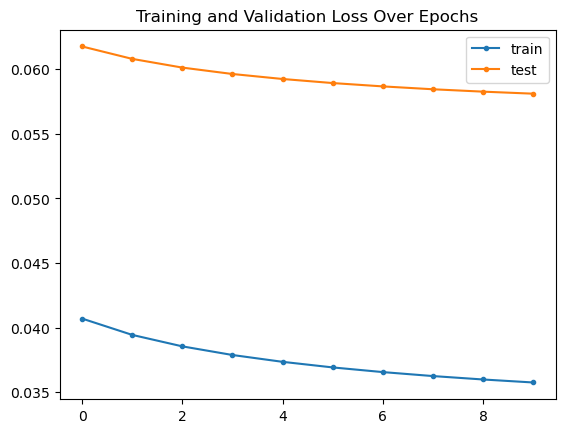

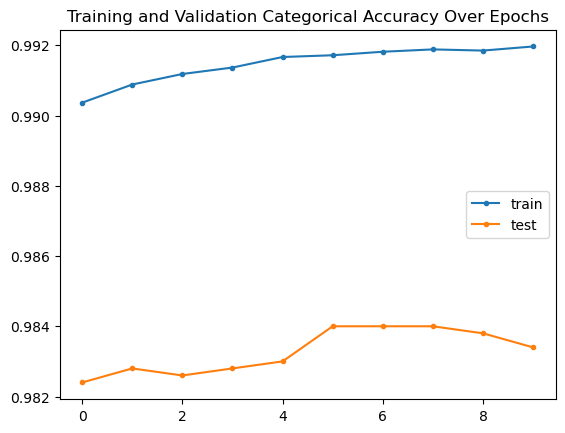

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - categorical_accuracy: 0.9925 - loss: 0.0253


[codecarbon INFO @ 16:33:44] 
Graceful stopping: collecting and writing information.
Please wait a few seconds...
[codecarbon INFO @ 16:33:44] Energy consumed for RAM : 0.013412 kWh. RAM Power : 330.1325168609619 W
[codecarbon INFO @ 16:33:44] Energy consumed for all CPUs : 0.001727 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:33:44] 0.015139 kWh of electricity used since the beginning.


Loss: 0.02704429253935814, Accuracy: 0.9932000041007996


[codecarbon INFO @ 16:33:44] Done!

[codecarbon INFO @ 16:33:44] [setup] RAM Tracking...
[codecarbon INFO @ 16:33:44] [setup] GPU Tracking...
[codecarbon INFO @ 16:33:44] No GPU found.
[codecarbon INFO @ 16:33:44] [setup] CPU Tracking...
[codecarbon WARNING @ 16:33:44] No CPU tracking mode found. Falling back on CPU constant mode.


Learning rate: 0.30000000000000004


[codecarbon WARNING @ 16:33:46] We saw that you have a Intel(R) Xeon(R) Gold 6248 CPU @ 2.50GHz but we don't know it. Please contact us.
[codecarbon INFO @ 16:33:46] CPU Model on constant consumption mode: Intel(R) Xeon(R) Gold 6248 CPU @ 2.50GHz
[codecarbon INFO @ 16:33:46] >>> Tracker's metadata:
[codecarbon INFO @ 16:33:46]   Platform system: Linux-6.1.0-32-amd64-x86_64-with-glibc2.36
[codecarbon INFO @ 16:33:46]   Python version: 3.12.3
[codecarbon INFO @ 16:33:46]   CodeCarbon version: 2.2.2
[codecarbon INFO @ 16:33:46]   Available RAM : 880.353 GB
[codecarbon INFO @ 16:33:46]   CPU count: 80
[codecarbon INFO @ 16:33:46]   CPU model: Intel(R) Xeon(R) Gold 6248 CPU @ 2.50GHz
[codecarbon INFO @ 16:33:46]   GPU count: None
[codecarbon INFO @ 16:33:46]   GPU model: None


Epoch 1/10
2996/3000 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - categorical_accuracy: 0.1117 - loss: 1112459520.0000

[codecarbon INFO @ 16:34:04] Energy consumed for RAM : 0.001376 kWh. RAM Power : 330.1325168609619 W
[codecarbon INFO @ 16:34:04] Energy consumed for all CPUs : 0.000177 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:34:04] 0.001553 kWh of electricity used since the beginning.


3000/3000 ━━━━━━━━━━━━━━━━━━━━ 15s 5ms/step - categorical_accuracy: 0.1117 - loss: 1111790976.0000 - val_categorical_accuracy: 0.0924 - val_loss: 531973920.0000
Epoch 2/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 15s 5ms/step - categorical_accuracy: 0.1062 - loss: 487682080.0000 - val_categorical_accuracy: 0.1142 - val_loss: 371141984.0000
Epoch 3/10


[codecarbon INFO @ 16:34:19] Energy consumed for RAM : 0.002751 kWh. RAM Power : 330.1325168609619 W
[codecarbon INFO @ 16:34:19] Energy consumed for all CPUs : 0.000354 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:34:19] 0.003105 kWh of electricity used since the beginning.


3000/3000 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - categorical_accuracy: 0.1069 - loss: 340240576.0000 - val_categorical_accuracy: 0.1142 - val_loss: 258933280.0000
Epoch 4/10
 118/3000 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - categorical_accuracy: 0.1061 - loss: 258027760.0000

[codecarbon INFO @ 16:34:34] Energy consumed for RAM : 0.004126 kWh. RAM Power : 330.1325168609619 W
[codecarbon INFO @ 16:34:34] Energy consumed for all CPUs : 0.000531 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:34:34] 0.004658 kWh of electricity used since the beginning.


3000/3000 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - categorical_accuracy: 0.1050 - loss: 237375200.0000 - val_categorical_accuracy: 0.1024 - val_loss: 180650000.0000
Epoch 5/10
 469/3000 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - categorical_accuracy: 0.1049 - loss: 178145072.0000

[codecarbon INFO @ 16:34:49] Energy consumed for RAM : 0.005502 kWh. RAM Power : 330.1325168609619 W
[codecarbon INFO @ 16:34:49] Energy consumed for all CPUs : 0.000708 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:34:49] 0.006210 kWh of electricity used since the beginning.


3000/3000 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - categorical_accuracy: 0.1049 - loss: 165609296.0000 - val_categorical_accuracy: 0.0924 - val_loss: 126033712.0000
Epoch 6/10
 769/3000 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - categorical_accuracy: 0.1096 - loss: 123188552.0000

[codecarbon INFO @ 16:35:04] Energy consumed for RAM : 0.006877 kWh. RAM Power : 330.1325168609619 W
[codecarbon INFO @ 16:35:04] Energy consumed for all CPUs : 0.000885 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:35:04] 0.007762 kWh of electricity used since the beginning.


3000/3000 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - categorical_accuracy: 0.1071 - loss: 115540368.0000 - val_categorical_accuracy: 0.1142 - val_loss: 87929752.0000
Epoch 7/10
1055/3000 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - categorical_accuracy: 0.1019 - loss: 85225888.0000

[codecarbon INFO @ 16:35:19] Energy consumed for RAM : 0.008252 kWh. RAM Power : 330.1325168609619 W
[codecarbon INFO @ 16:35:19] Energy consumed for all CPUs : 0.001062 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:35:19] 0.009315 kWh of electricity used since the beginning.


3000/3000 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - categorical_accuracy: 0.1049 - loss: 80608968.0000 - val_categorical_accuracy: 0.1060 - val_loss: 61345916.0000
Epoch 8/10
1379/3000 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - categorical_accuracy: 0.1010 - loss: 58900280.0000

[codecarbon INFO @ 16:35:34] Energy consumed for RAM : 0.009628 kWh. RAM Power : 330.1325168609619 W
[codecarbon INFO @ 16:35:34] Energy consumed for all CPUs : 0.001240 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:35:34] 0.010867 kWh of electricity used since the beginning.


3000/3000 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - categorical_accuracy: 0.1029 - loss: 56238320.0000 - val_categorical_accuracy: 0.1142 - val_loss: 42799112.0000
Epoch 9/10
1662/3000 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - categorical_accuracy: 0.1094 - loss: 40757512.0000

[codecarbon INFO @ 16:35:49] Energy consumed for RAM : 0.011003 kWh. RAM Power : 330.1325168609619 W
[codecarbon INFO @ 16:35:49] Energy consumed for all CPUs : 0.001417 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:35:49] 0.012419 kWh of electricity used since the beginning.


3000/3000 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - categorical_accuracy: 0.1078 - loss: 39235736.0000 - val_categorical_accuracy: 0.1142 - val_loss: 29859744.0000
Epoch 10/10
1948/3000 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - categorical_accuracy: 0.1055 - loss: 28202260.0000

[codecarbon INFO @ 16:36:04] Energy consumed for RAM : 0.012378 kWh. RAM Power : 330.1325168609619 W
[codecarbon INFO @ 16:36:04] Energy consumed for all CPUs : 0.001594 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:36:04] 0.013972 kWh of electricity used since the beginning.


3000/3000 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - categorical_accuracy: 0.1058 - loss: 27373540.0000 - val_categorical_accuracy: 0.1142 - val_loss: 20832152.0000
Restoring model weights from the end of the best epoch: 10.


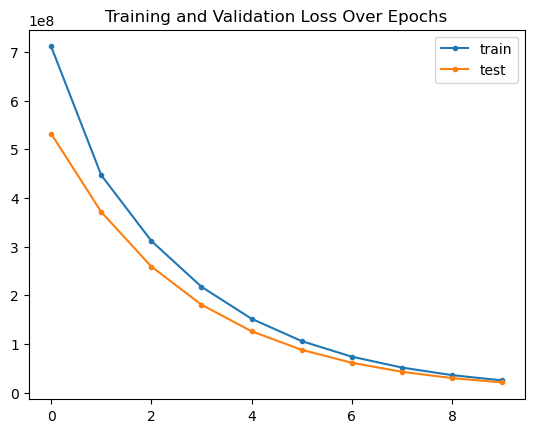

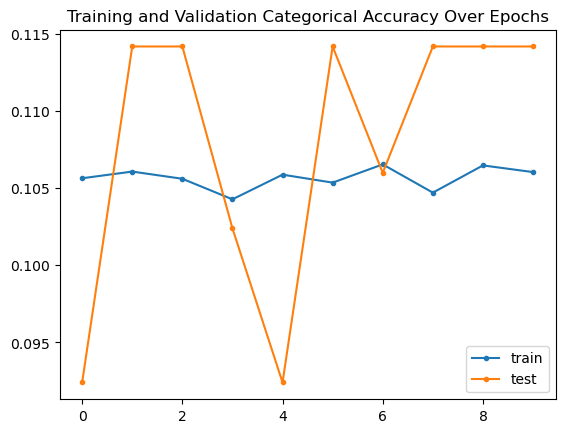

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - categorical_accuracy: 0.1124 - loss: 20832140.0000


[codecarbon INFO @ 16:36:10] 
Graceful stopping: collecting and writing information.
Please wait a few seconds...
[codecarbon INFO @ 16:36:10] Energy consumed for RAM : 0.012940 kWh. RAM Power : 330.1325168609619 W
[codecarbon INFO @ 16:36:10] Energy consumed for all CPUs : 0.001666 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:36:10] 0.014606 kWh of electricity used since the beginning.


Loss: 20832172.0, Accuracy: 0.1128000020980835


[codecarbon INFO @ 16:36:10] Done!



In [14]:
@track_emissions
def simple_model_run(X_train, y_train, call_back_simple, X_validation, y_validation, X_test, y_test, l_rate):
    # Mid Model
    simple.compile(
        loss= keras.losses.CategoricalCrossentropy(),
        optimizer=keras.optimizers.SGD(learning_rate=l_rate),
        metrics=[keras.metrics.CategoricalAccuracy()]
    )
    history = simple.fit(X_train,y_train,
                        epochs=10, batch_size=20,
                        callbacks=[early_stopping, call_back_simple],
                        validation_data=(X_validation,y_validation) )
    #plotting loss 
    plt.plot(history.history['loss'],'.-', label = 'train')
    plt.plot(history.history['val_loss'],'.-', label = 'test')
    plt.title('Training and Validation Loss Over Epochs')
    plt.legend()
    plt.show()

    # plotting categorical accuracy
    plt.plot(history.history['categorical_accuracy'],'.-', label = 'train')
    plt.plot(history.history['val_categorical_accuracy'],'.-', label = 'test')
    plt.legend()
    plt.title('Training and Validation Categorical Accuracy Over Epochs')
    plt.show()
    
    loss_simple,acc_simple = simple.evaluate(X_test,y_test)
    print(f'Loss: {loss_simple}, Accuracy: {acc_simple}')


learning_rate = [1e-10,1e-05,3*1e-1]
for l_rate in learning_rate:
    print(f'Learning rate: {l_rate}')
    simple_model_run(X_train, y_train, call_back_simple, X_validation, y_validation, X_test, y_test, l_rate)



# Experiment 3:  Stochastic vs Adam optimizer

[codecarbon INFO @ 16:36:10] [setup] RAM Tracking...
[codecarbon INFO @ 16:36:10] [setup] GPU Tracking...
[codecarbon INFO @ 16:36:10] No GPU found.
[codecarbon INFO @ 16:36:10] [setup] CPU Tracking...
[codecarbon WARNING @ 16:36:10] No CPU tracking mode found. Falling back on CPU constant mode.


Optimizer name is : Stochastic


[codecarbon WARNING @ 16:36:11] We saw that you have a Intel(R) Xeon(R) Gold 6248 CPU @ 2.50GHz but we don't know it. Please contact us.
[codecarbon INFO @ 16:36:11] CPU Model on constant consumption mode: Intel(R) Xeon(R) Gold 6248 CPU @ 2.50GHz
[codecarbon INFO @ 16:36:11] >>> Tracker's metadata:
[codecarbon INFO @ 16:36:11]   Platform system: Linux-6.1.0-32-amd64-x86_64-with-glibc2.36
[codecarbon INFO @ 16:36:11]   Python version: 3.12.3
[codecarbon INFO @ 16:36:11]   CodeCarbon version: 2.2.2
[codecarbon INFO @ 16:36:11]   Available RAM : 880.353 GB
[codecarbon INFO @ 16:36:11]   CPU count: 80
[codecarbon INFO @ 16:36:11]   CPU model: Intel(R) Xeon(R) Gold 6248 CPU @ 2.50GHz
[codecarbon INFO @ 16:36:11]   GPU count: None
[codecarbon INFO @ 16:36:11]   GPU model: None


Epoch 1/5
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - categorical_accuracy: 0.1129 - loss: 20769520.0000 - val_categorical_accuracy: 0.1142 - val_loss: 20582264.0000
Epoch 2/5
 140/3000 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - categorical_accuracy: 0.1028 - loss: 20579320.0000

[codecarbon INFO @ 16:36:30] Energy consumed for RAM : 0.001376 kWh. RAM Power : 330.1325168609619 W
[codecarbon INFO @ 16:36:30] Energy consumed for all CPUs : 0.000177 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:36:30] 0.001553 kWh of electricity used since the beginning.


3000/3000 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - categorical_accuracy: 0.1124 - loss: 20520076.0000 - val_categorical_accuracy: 0.1142 - val_loss: 20335446.0000
Epoch 3/5
 446/3000 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - categorical_accuracy: 0.1183 - loss: 20326552.0000

[codecarbon INFO @ 16:36:45] Energy consumed for RAM : 0.002751 kWh. RAM Power : 330.1325168609619 W
[codecarbon INFO @ 16:36:45] Energy consumed for all CPUs : 0.000354 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:36:45] 0.003105 kWh of electricity used since the beginning.


3000/3000 ━━━━━━━━━━━━━━━━━━━━ 15s 5ms/step - categorical_accuracy: 0.1146 - loss: 20275256.0000 - val_categorical_accuracy: 0.1142 - val_loss: 20095002.0000
Epoch 4/5
 470/3000 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - categorical_accuracy: 0.1111 - loss: 20085672.0000

[codecarbon INFO @ 16:37:00] Energy consumed for RAM : 0.004126 kWh. RAM Power : 330.1325168609619 W


 481/3000 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - categorical_accuracy: 0.1111 - loss: 20085452.0000

[codecarbon INFO @ 16:37:00] Energy consumed for all CPUs : 0.000531 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:37:00] 0.004658 kWh of electricity used since the beginning.


3000/3000 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - categorical_accuracy: 0.1119 - loss: 20035250.0000 - val_categorical_accuracy: 0.1142 - val_loss: 19856318.0000
Epoch 5/5
 759/3000 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - categorical_accuracy: 0.1072 - loss: 19841348.0000

[codecarbon INFO @ 16:37:15] Energy consumed for RAM : 0.005502 kWh. RAM Power : 330.1325168609619 W
[codecarbon INFO @ 16:37:15] Energy consumed for all CPUs : 0.000708 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:37:15] 0.006210 kWh of electricity used since the beginning.


3000/3000 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - categorical_accuracy: 0.1110 - loss: 19797016.0000 - val_categorical_accuracy: 0.1142 - val_loss: 19619540.0000


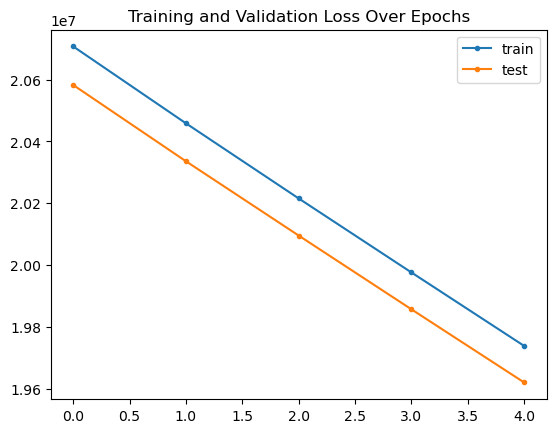

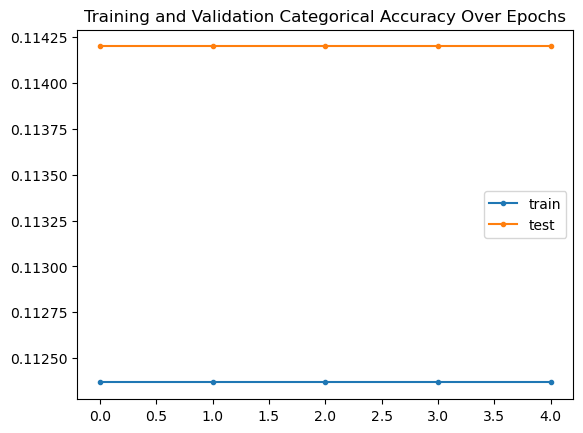

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - categorical_accuracy: 0.1124 - loss: 19619552.0000


[codecarbon INFO @ 16:37:26] 
Graceful stopping: collecting and writing information.
Please wait a few seconds...
[codecarbon INFO @ 16:37:26] Energy consumed for RAM : 0.006524 kWh. RAM Power : 330.1325168609619 W
[codecarbon INFO @ 16:37:26] Energy consumed for all CPUs : 0.000840 kWh. Total CPU Power : 42.5 W


Loss: 19619566.0, Accuracy: 0.1128000020980835


[codecarbon INFO @ 16:37:26] 0.007363 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:37:26] Done!

[codecarbon INFO @ 16:37:26] [setup] RAM Tracking...
[codecarbon INFO @ 16:37:26] [setup] GPU Tracking...
[codecarbon INFO @ 16:37:26] No GPU found.
[codecarbon INFO @ 16:37:26] [setup] CPU Tracking...
[codecarbon WARNING @ 16:37:26] No CPU tracking mode found. Falling back on CPU constant mode.


Optimizer name is : Adam


[codecarbon WARNING @ 16:37:27] We saw that you have a Intel(R) Xeon(R) Gold 6248 CPU @ 2.50GHz but we don't know it. Please contact us.
[codecarbon INFO @ 16:37:27] CPU Model on constant consumption mode: Intel(R) Xeon(R) Gold 6248 CPU @ 2.50GHz
[codecarbon INFO @ 16:37:27] >>> Tracker's metadata:
[codecarbon INFO @ 16:37:27]   Platform system: Linux-6.1.0-32-amd64-x86_64-with-glibc2.36
[codecarbon INFO @ 16:37:27]   Python version: 3.12.3
[codecarbon INFO @ 16:37:27]   CodeCarbon version: 2.2.2
[codecarbon INFO @ 16:37:27]   Available RAM : 880.353 GB
[codecarbon INFO @ 16:37:27]   CPU count: 80
[codecarbon INFO @ 16:37:27]   CPU model: Intel(R) Xeon(R) Gold 6248 CPU @ 2.50GHz
[codecarbon INFO @ 16:37:27]   GPU count: None
[codecarbon INFO @ 16:37:27]   GPU model: None


Epoch 1/5
2926/3000 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - categorical_accuracy: 0.1130 - loss: 19618758.0000

[codecarbon INFO @ 16:37:45] Energy consumed for RAM : 0.001376 kWh. RAM Power : 330.1325168609619 W
[codecarbon INFO @ 16:37:45] Energy consumed for all CPUs : 0.000177 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:37:45] 0.001553 kWh of electricity used since the beginning.


3000/3000 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step - categorical_accuracy: 0.1130 - loss: 19618736.0000 - val_categorical_accuracy: 0.1142 - val_loss: 19615780.0000
Epoch 2/5
2986/3000 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - categorical_accuracy: 0.1149 - loss: 19615062.0000

[codecarbon INFO @ 16:38:00] Energy consumed for RAM : 0.002751 kWh. RAM Power : 330.1325168609619 W
[codecarbon INFO @ 16:38:00] Energy consumed for all CPUs : 0.000354 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:38:00] 0.003105 kWh of electricity used since the beginning.


3000/3000 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - categorical_accuracy: 0.1149 - loss: 19615058.0000 - val_categorical_accuracy: 0.1142 - val_loss: 19612092.0000
Epoch 3/5
2999/3000 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - categorical_accuracy: 0.1135 - loss: 19611244.0000

[codecarbon INFO @ 16:38:15] Energy consumed for RAM : 0.004126 kWh. RAM Power : 330.1325168609619 W
[codecarbon INFO @ 16:38:15] Energy consumed for all CPUs : 0.000531 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:38:15] 0.004658 kWh of electricity used since the beginning.


3000/3000 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - categorical_accuracy: 0.1135 - loss: 19611244.0000 - val_categorical_accuracy: 0.1142 - val_loss: 19608400.0000
Epoch 4/5
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - categorical_accuracy: 0.1120 - loss: 19607194.0000 - val_categorical_accuracy: 0.1142 - val_loss: 19604712.0000
Epoch 5/5
 140/3000 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - categorical_accuracy: 0.1019 - loss: 19604708.0000

[codecarbon INFO @ 16:38:30] Energy consumed for RAM : 0.005502 kWh. RAM Power : 330.1325168609619 W
[codecarbon INFO @ 16:38:30] Energy consumed for all CPUs : 0.000708 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:38:30] 0.006210 kWh of electricity used since the beginning.


3000/3000 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - categorical_accuracy: 0.1106 - loss: 19603736.0000 - val_categorical_accuracy: 0.1142 - val_loss: 19601026.0000


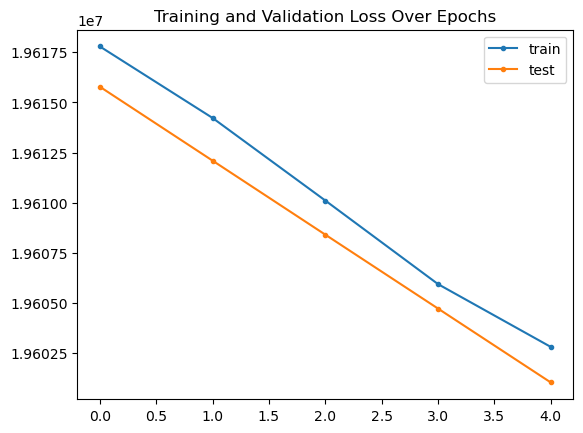

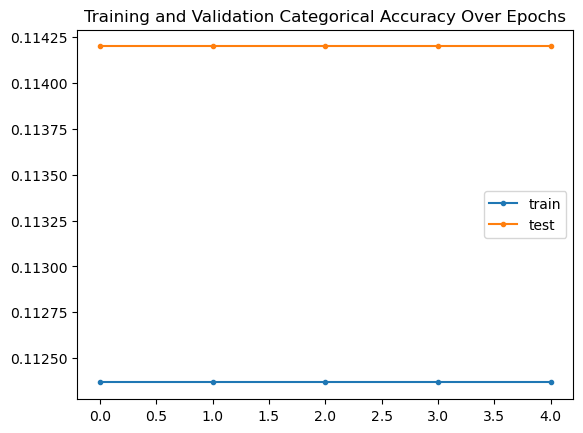

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - categorical_accuracy: 0.1124 - loss: 19601046.0000


[codecarbon INFO @ 16:38:44] 
Graceful stopping: collecting and writing information.
Please wait a few seconds...
[codecarbon INFO @ 16:38:44] Energy consumed for RAM : 0.006807 kWh. RAM Power : 330.1325168609619 W
[codecarbon INFO @ 16:38:44] Energy consumed for all CPUs : 0.000876 kWh. Total CPU Power : 42.5 W


Loss: 19601068.0, Accuracy: 0.1128000020980835


[codecarbon INFO @ 16:38:44] 0.007684 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:38:44] Done!



In [15]:

@track_emissions
def simple_model_run(X_train, y_train, call_back_simple, X_validation, y_validation, X_test, y_test, optimizer):
    # simple model
    if optimizer == 'Stochastic':
        
        simple.compile(
            loss= keras.losses.CategoricalCrossentropy(),
            optimizer=keras.optimizers.SGD(),
            metrics=[keras.metrics.CategoricalAccuracy()]
        )
    elif optimizer == 'Adam':
        simple.compile(
        loss= keras.losses.CategoricalCrossentropy(),
        optimizer=keras.optimizers.Adam(),
        metrics=[keras.metrics.CategoricalAccuracy()]
    )
    history = simple.fit(X_train,y_train,
                        epochs=5, batch_size=20,
                        callbacks=[call_back_simple],
                        validation_data=(X_validation,y_validation) )
    #plotting loss 
    plt.plot(history.history['loss'],'.-', label = 'train')
    plt.plot(history.history['val_loss'],'.-', label = 'test')
    plt.title('Training and Validation Loss Over Epochs')
    plt.legend()
    plt.show()

    # plotting categorical accuracy
    plt.plot(history.history['categorical_accuracy'],'.-', label = 'train')
    plt.plot(history.history['val_categorical_accuracy'],'.-', label = 'test')
    plt.legend()
    plt.title('Training and Validation Categorical Accuracy Over Epochs')
    plt.show()
    
    loss_simple,acc_simple = simple.evaluate(X_test,y_test)
    print(f'Loss: {loss_simple}, Accuracy: {acc_simple}')


optimizer = ['Stochastic', 'Adam']
for opt in optimizer:
    print(f'Optimizer name is : {opt}')
    simple_model_run(X_train, y_train, call_back_simple, X_validation, y_validation, X_test, y_test, opt)

# Experiment 4: Early stopping with and without

[codecarbon INFO @ 16:38:45] [setup] RAM Tracking...
[codecarbon INFO @ 16:38:45] [setup] GPU Tracking...
[codecarbon INFO @ 16:38:45] No GPU found.
[codecarbon INFO @ 16:38:45] [setup] CPU Tracking...
[codecarbon WARNING @ 16:38:45] No CPU tracking mode found. Falling back on CPU constant mode.


With earlystopping True


[codecarbon WARNING @ 16:38:46] We saw that you have a Intel(R) Xeon(R) Gold 6248 CPU @ 2.50GHz but we don't know it. Please contact us.
[codecarbon INFO @ 16:38:46] CPU Model on constant consumption mode: Intel(R) Xeon(R) Gold 6248 CPU @ 2.50GHz
[codecarbon INFO @ 16:38:46] >>> Tracker's metadata:
[codecarbon INFO @ 16:38:46]   Platform system: Linux-6.1.0-32-amd64-x86_64-with-glibc2.36
[codecarbon INFO @ 16:38:46]   Python version: 3.12.3
[codecarbon INFO @ 16:38:46]   CodeCarbon version: 2.2.2
[codecarbon INFO @ 16:38:46]   Available RAM : 880.353 GB
[codecarbon INFO @ 16:38:46]   CPU count: 80
[codecarbon INFO @ 16:38:46]   CPU model: Intel(R) Xeon(R) Gold 6248 CPU @ 2.50GHz
[codecarbon INFO @ 16:38:46]   GPU count: None
[codecarbon INFO @ 16:38:46]   GPU model: None


Epoch 1/10
2123/3000 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - categorical_accuracy: 0.9919 - loss: 0.0282

[codecarbon INFO @ 16:39:04] Energy consumed for RAM : 0.001376 kWh. RAM Power : 330.1325168609619 W
[codecarbon INFO @ 16:39:04] Energy consumed for all CPUs : 0.000177 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:39:04] 0.001553 kWh of electricity used since the beginning.


3000/3000 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - categorical_accuracy: 0.9917 - loss: 0.0285 - val_categorical_accuracy: 0.9796 - val_loss: 0.0709
Epoch 2/10
1176/3000 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - categorical_accuracy: 0.9934 - loss: 0.0228

[codecarbon INFO @ 16:39:19] Energy consumed for RAM : 0.002752 kWh. RAM Power : 330.1325168609619 W
[codecarbon INFO @ 16:39:19] Energy consumed for all CPUs : 0.000354 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:39:19] 0.003106 kWh of electricity used since the beginning.


3000/3000 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - categorical_accuracy: 0.9934 - loss: 0.0234 - val_categorical_accuracy: 0.9852 - val_loss: 0.0494
Epoch 3/10
 239/3000 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - categorical_accuracy: 0.9943 - loss: 0.0209

[codecarbon INFO @ 16:39:34] Energy consumed for RAM : 0.004127 kWh. RAM Power : 330.1325168609619 W
[codecarbon INFO @ 16:39:34] Energy consumed for all CPUs : 0.000531 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:39:34] 0.004658 kWh of electricity used since the beginning.


2467/3000 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - categorical_accuracy: 0.9939 - loss: 0.0215

[codecarbon INFO @ 16:39:49] Energy consumed for RAM : 0.005502 kWh. RAM Power : 330.1325168609619 W
[codecarbon INFO @ 16:39:49] Energy consumed for all CPUs : 0.000708 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:39:49] 0.006211 kWh of electricity used since the beginning.


3000/3000 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - categorical_accuracy: 0.9939 - loss: 0.0216 - val_categorical_accuracy: 0.9834 - val_loss: 0.0574
Epoch 4/10
1552/3000 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - categorical_accuracy: 0.9964 - loss: 0.0147

[codecarbon INFO @ 16:40:04] Energy consumed for RAM : 0.006878 kWh. RAM Power : 330.1325168609619 W
[codecarbon INFO @ 16:40:04] Energy consumed for all CPUs : 0.000885 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:40:04] 0.007763 kWh of electricity used since the beginning.


3000/3000 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - categorical_accuracy: 0.9961 - loss: 0.0157 - val_categorical_accuracy: 0.9852 - val_loss: 0.0522
Epoch 4: early stopping
Restoring model weights from the end of the best epoch: 2.


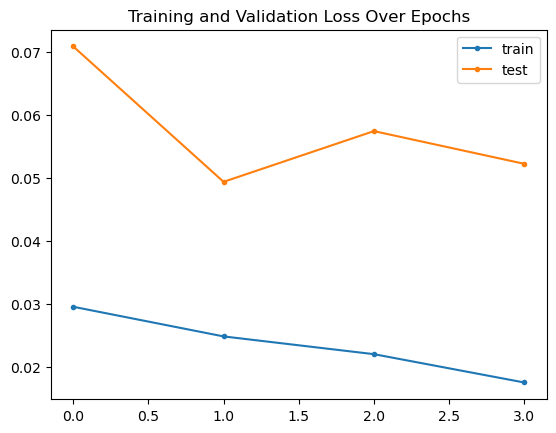

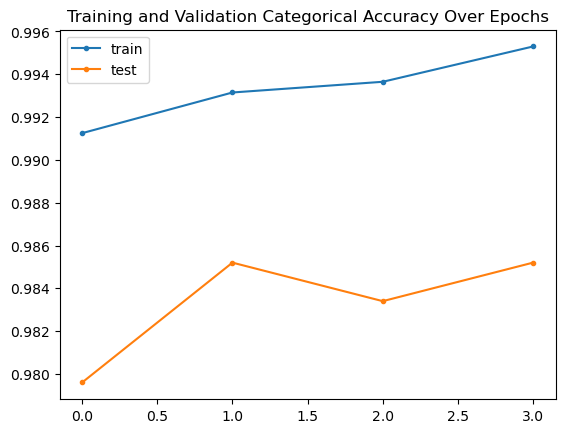

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - categorical_accuracy: 0.9955 - loss: 0.0171


[codecarbon INFO @ 16:40:16] 
Graceful stopping: collecting and writing information.
Please wait a few seconds...
[codecarbon INFO @ 16:40:16] Energy consumed for RAM : 0.007935 kWh. RAM Power : 330.1325168609619 W
[codecarbon INFO @ 16:40:16] Energy consumed for all CPUs : 0.001022 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:40:16] 0.008956 kWh of electricity used since the beginning.


Loss: 0.022422872483730316, Accuracy: 0.9936000108718872


[codecarbon INFO @ 16:40:16] Done!

[codecarbon INFO @ 16:40:16] [setup] RAM Tracking...
[codecarbon INFO @ 16:40:16] [setup] GPU Tracking...
[codecarbon INFO @ 16:40:16] No GPU found.
[codecarbon INFO @ 16:40:16] [setup] CPU Tracking...
[codecarbon WARNING @ 16:40:16] No CPU tracking mode found. Falling back on CPU constant mode.


With earlystopping False


[codecarbon WARNING @ 16:40:17] We saw that you have a Intel(R) Xeon(R) Gold 6248 CPU @ 2.50GHz but we don't know it. Please contact us.
[codecarbon INFO @ 16:40:17] CPU Model on constant consumption mode: Intel(R) Xeon(R) Gold 6248 CPU @ 2.50GHz
[codecarbon INFO @ 16:40:17] >>> Tracker's metadata:
[codecarbon INFO @ 16:40:17]   Platform system: Linux-6.1.0-32-amd64-x86_64-with-glibc2.36
[codecarbon INFO @ 16:40:17]   Python version: 3.12.3
[codecarbon INFO @ 16:40:17]   CodeCarbon version: 2.2.2
[codecarbon INFO @ 16:40:17]   Available RAM : 880.353 GB
[codecarbon INFO @ 16:40:17]   CPU count: 80
[codecarbon INFO @ 16:40:17]   CPU model: Intel(R) Xeon(R) Gold 6248 CPU @ 2.50GHz
[codecarbon INFO @ 16:40:17]   GPU count: None
[codecarbon INFO @ 16:40:17]   GPU model: None


Epoch 1/10
2108/3000 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - categorical_accuracy: 0.9942 - loss: 0.0203

[codecarbon INFO @ 16:40:35] Energy consumed for RAM : 0.001376 kWh. RAM Power : 330.1325168609619 W
[codecarbon INFO @ 16:40:35] Energy consumed for all CPUs : 0.000177 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:40:35] 0.001553 kWh of electricity used since the beginning.


3000/3000 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - categorical_accuracy: 0.9942 - loss: 0.0206 - val_categorical_accuracy: 0.9848 - val_loss: 0.0568
Epoch 2/10
1226/3000 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - categorical_accuracy: 0.9955 - loss: 0.0175

[codecarbon INFO @ 16:40:50] Energy consumed for RAM : 0.002751 kWh. RAM Power : 330.1325168609619 W
[codecarbon INFO @ 16:40:50] Energy consumed for all CPUs : 0.000354 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:40:50] 0.003105 kWh of electricity used since the beginning.


3000/3000 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - categorical_accuracy: 0.9954 - loss: 0.0176 - val_categorical_accuracy: 0.9840 - val_loss: 0.0527
Epoch 3/10
 306/3000 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - categorical_accuracy: 0.9963 - loss: 0.0132

[codecarbon INFO @ 16:41:05] Energy consumed for RAM : 0.004126 kWh. RAM Power : 330.1325168609619 W
[codecarbon INFO @ 16:41:05] Energy consumed for all CPUs : 0.000531 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:41:05] 0.004658 kWh of electricity used since the beginning.


2623/3000 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - categorical_accuracy: 0.9958 - loss: 0.0154

[codecarbon INFO @ 16:41:20] Energy consumed for RAM : 0.005502 kWh. RAM Power : 330.1325168609619 W
[codecarbon INFO @ 16:41:20] Energy consumed for all CPUs : 0.000708 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:41:20] 0.006210 kWh of electricity used since the beginning.


3000/3000 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - categorical_accuracy: 0.9958 - loss: 0.0154 - val_categorical_accuracy: 0.9846 - val_loss: 0.0572
Epoch 4/10
1787/3000 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - categorical_accuracy: 0.9977 - loss: 0.0104

[codecarbon INFO @ 16:41:35] Energy consumed for RAM : 0.006877 kWh. RAM Power : 330.1325168609619 W
[codecarbon INFO @ 16:41:35] Energy consumed for all CPUs : 0.000885 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:41:35] 0.007762 kWh of electricity used since the beginning.


3000/3000 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - categorical_accuracy: 0.9977 - loss: 0.0107 - val_categorical_accuracy: 0.9830 - val_loss: 0.0633
Epoch 5/10
 904/3000 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - categorical_accuracy: 0.9962 - loss: 0.0174

[codecarbon INFO @ 16:41:50] Energy consumed for RAM : 0.008252 kWh. RAM Power : 330.1325168609619 W
[codecarbon INFO @ 16:41:50] Energy consumed for all CPUs : 0.001062 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:41:50] 0.009315 kWh of electricity used since the beginning.


3000/3000 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - categorical_accuracy: 0.9970 - loss: 0.0143 - val_categorical_accuracy: 0.9850 - val_loss: 0.0604
Epoch 6/10
  49/3000 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - categorical_accuracy: 0.9998 - loss: 0.0062

[codecarbon INFO @ 16:42:05] Energy consumed for RAM : 0.009628 kWh. RAM Power : 330.1325168609619 W
[codecarbon INFO @ 16:42:05] Energy consumed for all CPUs : 0.001240 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:42:05] 0.010867 kWh of electricity used since the beginning.


2352/3000 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - categorical_accuracy: 0.9973 - loss: 0.0104

[codecarbon INFO @ 16:42:20] Energy consumed for RAM : 0.011003 kWh. RAM Power : 330.1325168609619 W
[codecarbon INFO @ 16:42:20] Energy consumed for all CPUs : 0.001417 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:42:20] 0.012420 kWh of electricity used since the beginning.


3000/3000 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - categorical_accuracy: 0.9973 - loss: 0.0105 - val_categorical_accuracy: 0.9854 - val_loss: 0.0593
Epoch 7/10
1518/3000 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - categorical_accuracy: 0.9985 - loss: 0.0085

[codecarbon INFO @ 16:42:35] Energy consumed for RAM : 0.012378 kWh. RAM Power : 330.1325168609619 W
[codecarbon INFO @ 16:42:35] Energy consumed for all CPUs : 0.001594 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:42:35] 0.013972 kWh of electricity used since the beginning.


3000/3000 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - categorical_accuracy: 0.9984 - loss: 0.0084 - val_categorical_accuracy: 0.9872 - val_loss: 0.0548
Epoch 8/10
 684/3000 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - categorical_accuracy: 0.9974 - loss: 0.0092

[codecarbon INFO @ 16:42:50] Energy consumed for RAM : 0.013754 kWh. RAM Power : 330.1325168609619 W
[codecarbon INFO @ 16:42:50] Energy consumed for all CPUs : 0.001771 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:42:50] 0.015524 kWh of electricity used since the beginning.


2964/3000 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - categorical_accuracy: 0.9985 - loss: 0.0076

[codecarbon INFO @ 16:43:05] Energy consumed for RAM : 0.015129 kWh. RAM Power : 330.1325168609619 W
[codecarbon INFO @ 16:43:05] Energy consumed for all CPUs : 0.001948 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:43:05] 0.017077 kWh of electricity used since the beginning.


3000/3000 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - categorical_accuracy: 0.9985 - loss: 0.0076 - val_categorical_accuracy: 0.9868 - val_loss: 0.0546
Epoch 9/10
1970/3000 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - categorical_accuracy: 0.9996 - loss: 0.0049

[codecarbon INFO @ 16:43:20] Energy consumed for RAM : 0.016504 kWh. RAM Power : 330.1325168609619 W
[codecarbon INFO @ 16:43:20] Energy consumed for all CPUs : 0.002125 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:43:20] 0.018629 kWh of electricity used since the beginning.


3000/3000 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - categorical_accuracy: 0.9995 - loss: 0.0053 - val_categorical_accuracy: 0.9858 - val_loss: 0.0528
Epoch 10/10
1073/3000 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - categorical_accuracy: 0.9995 - loss: 0.0056

[codecarbon INFO @ 16:43:35] Energy consumed for RAM : 0.017880 kWh. RAM Power : 330.1325168609619 W
[codecarbon INFO @ 16:43:35] Energy consumed for all CPUs : 0.002302 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:43:35] 0.020182 kWh of electricity used since the beginning.


3000/3000 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - categorical_accuracy: 0.9992 - loss: 0.0061 - val_categorical_accuracy: 0.9862 - val_loss: 0.0562


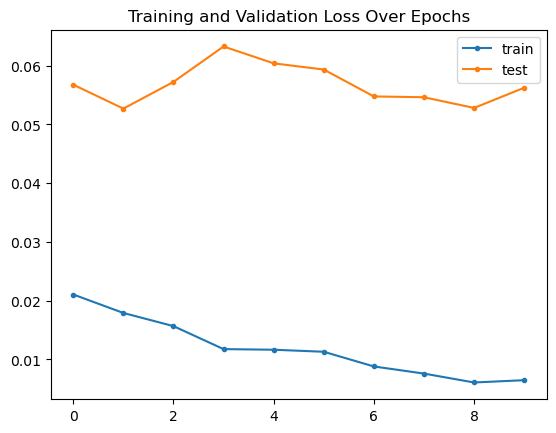

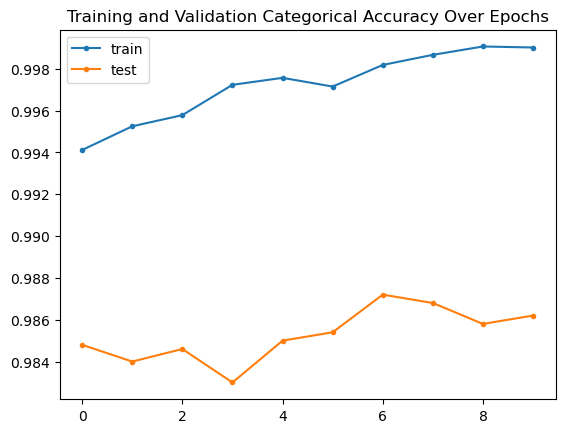

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - categorical_accuracy: 0.9957 - loss: 0.0151


[codecarbon INFO @ 16:43:50] 
Graceful stopping: collecting and writing information.
Please wait a few seconds...
[codecarbon INFO @ 16:43:50] Energy consumed for RAM : 0.019232 kWh. RAM Power : 330.1325168609619 W
[codecarbon INFO @ 16:43:50] Energy consumed for all CPUs : 0.002476 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:43:50] 0.021708 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:43:50] Done!



Loss: 0.017305243760347366, Accuracy: 0.9950000047683716


In [16]:

@track_emissions
def large_model_run(X_train, y_train, call_back_large, X_validation, y_validation, X_test, y_test, e_stopping):
    # Large Model
    large.compile(
        loss= keras.losses.CategoricalCrossentropy(),
        optimizer=keras.optimizers.SGD(),
        metrics=[keras.metrics.CategoricalAccuracy()]
    )
    call_backs = [call_back_large]
    if e_stopping:
        call_backs.append(early_stopping)
        
    large_history = large.fit(X_train,y_train,
                    epochs=10, batch_size=20,
                    callbacks= call_backs,
                    validation_data=(X_validation,y_validation))
    
    #plotting loss 
    plt.plot(large_history.history['loss'],'.-', label = 'train')
    plt.plot(large_history.history['val_loss'],'.-', label = 'test')
    plt.title('Training and Validation Loss Over Epochs')
    plt.legend()
    plt.show()

    # plotting categorical accuracy
    plt.plot(large_history.history['categorical_accuracy'],'.-', label = 'train')
    plt.plot(large_history.history['val_categorical_accuracy'],'.-', label = 'test')
    plt.title('Training and Validation Categorical Accuracy Over Epochs')
    plt.legend()
    plt.show()

    loss_large,acc_large = large.evaluate(X_test,y_test)
    print(f'Loss: {loss_large}, Accuracy: {acc_large}')
    
e_stopping = [True, False]
for e_stop in e_stopping:
    print(f'With earlystopping {e_stop}')
    large_model_run(X_train, y_train, call_back_large, X_validation, y_validation, X_test, y_test, e_stop)